In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('/content/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x=data.drop(columns="median_house_value",axis=1)
y=data["median_house_value"]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,)

In [9]:
train_data = x_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8473,-118.32,33.91,35.0,881.0,159.0,605.0,170.0,3.6654,<1H OCEAN,184500.0
15247,-117.26,32.99,16.0,2127.0,512.0,1532.0,499.0,2.7348,NEAR OCEAN,231300.0
15820,-122.42,37.75,52.0,1855.0,611.0,1715.0,614.0,2.1289,NEAR BAY,250000.0
5290,-118.49,34.05,45.0,1346.0,214.0,415.0,209.0,7.0285,<1H OCEAN,500001.0
11476,-118.02,33.70,23.0,5069.0,770.0,2473.0,769.0,6.3047,<1H OCEAN,285700.0
...,...,...,...,...,...,...,...,...,...,...
1848,-122.27,37.91,47.0,1930.0,315.0,692.0,296.0,6.3669,NEAR BAY,315500.0
4105,-118.34,34.12,41.0,3257.0,679.0,1237.0,638.0,4.2415,<1H OCEAN,409600.0
6168,-117.93,34.09,35.0,1891.0,353.0,1093.0,382.0,4.0167,<1H OCEAN,165500.0
18600,-122.18,37.15,17.0,1457.0,289.0,591.0,235.0,5.5785,NEAR OCEAN,284100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

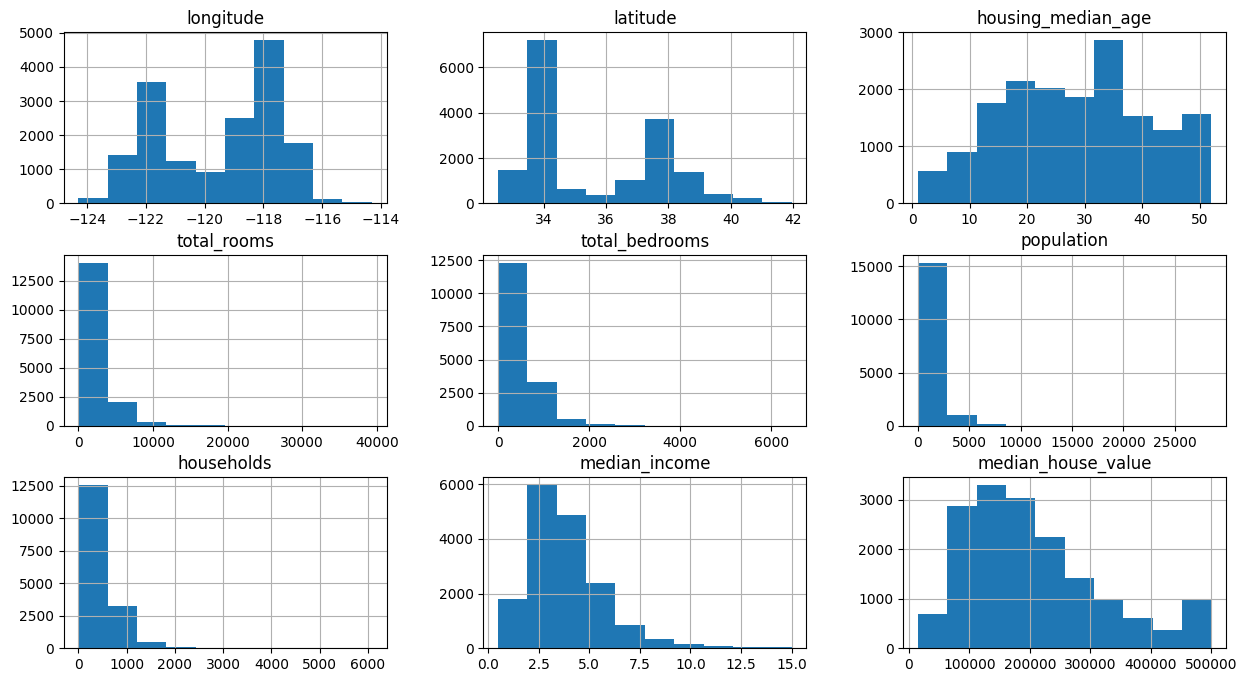

In [10]:
train_data.hist(figsize=(15,8))

In [11]:

train_data=train_data.join(pd.get_dummies(train_data["ocean_proximity"])).drop("ocean_proximity",axis=1)

In [12]:
import seaborn as sns

In [13]:
train_data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8473,-118.32,33.91,35.0,881.0,159.0,605.0,170.0,3.6654,184500.0,True,False,False,False,False


In [14]:
data.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [ ]:
# plt.figure(figsize=(15,8))
# sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [15]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+1)
train_data["population"]=np.log(train_data["population"]+1)
train_data["households"]=np.log(train_data["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

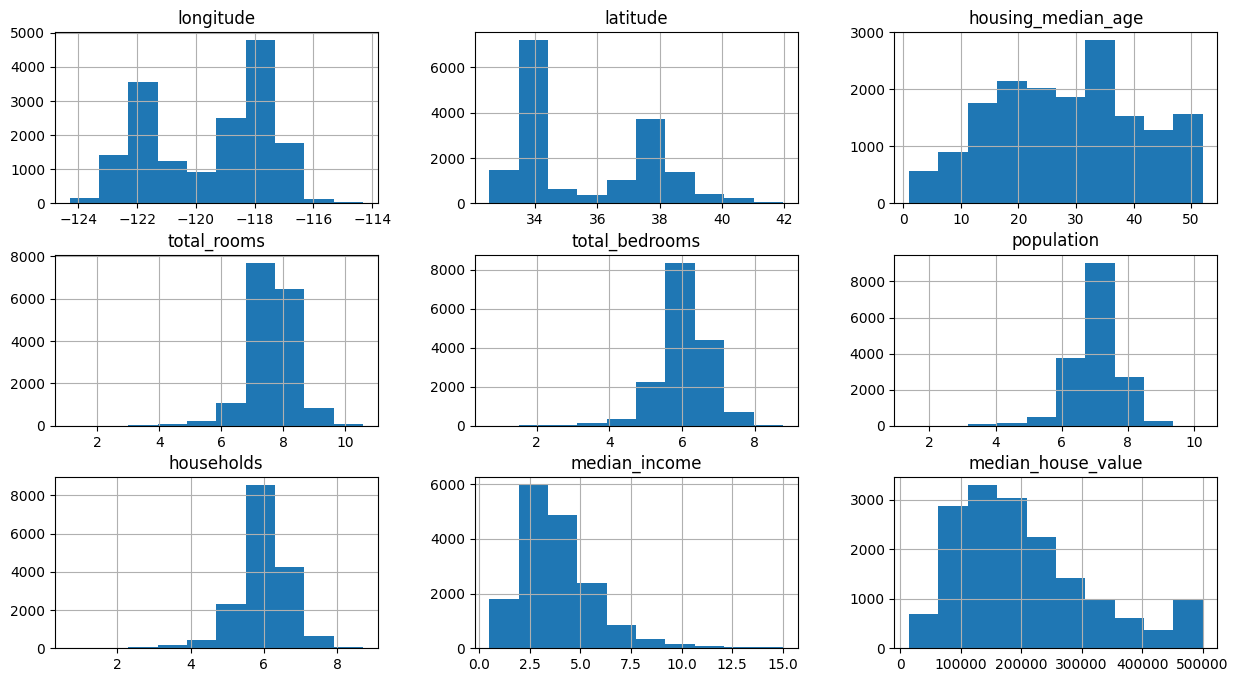

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8473,-118.32,33.91,35.0,6.782192,5.075174,6.406880,5.141664,3.6654,184500.0,True,False,False,False,False
15247,-117.26,32.99,16.0,7.662938,6.240276,7.334982,6.214608,2.7348,231300.0,False,False,False,False,True


<Axes: >

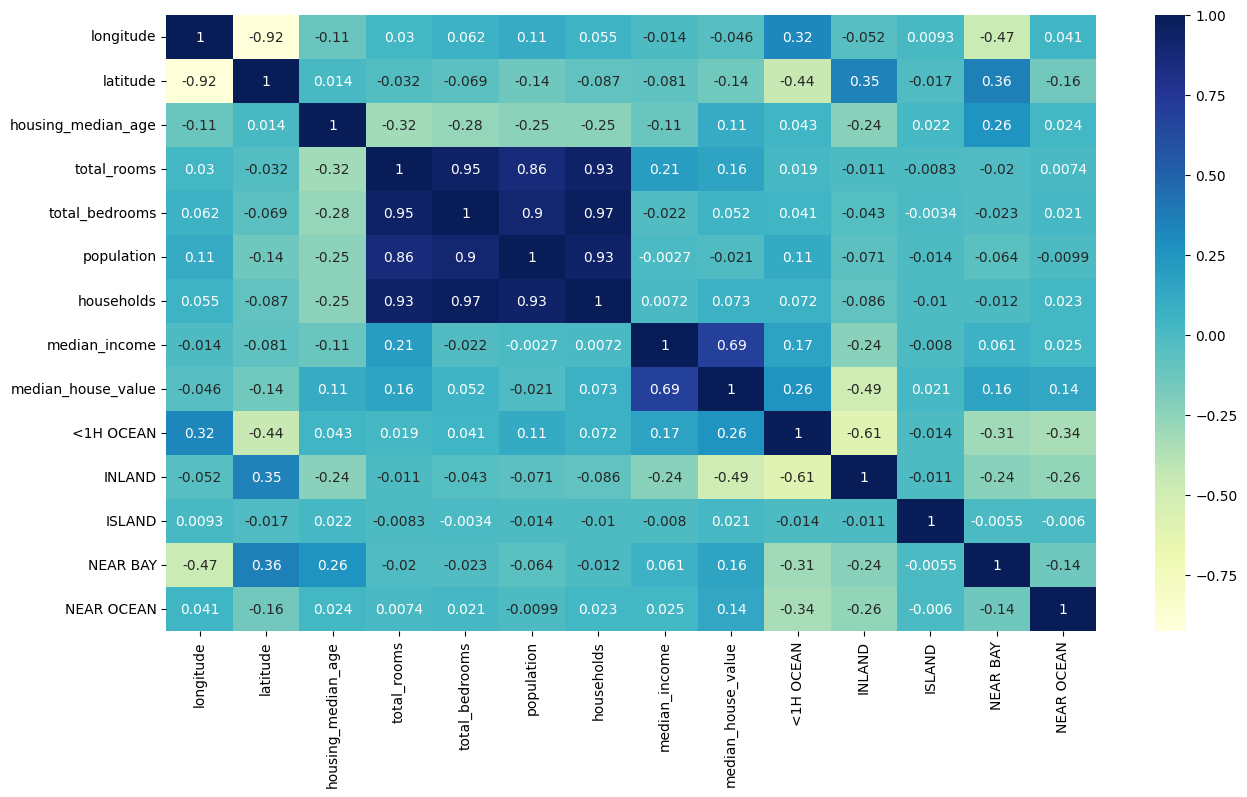

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [ ]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

<Axes: xlabel='latitude', ylabel='longitude'>

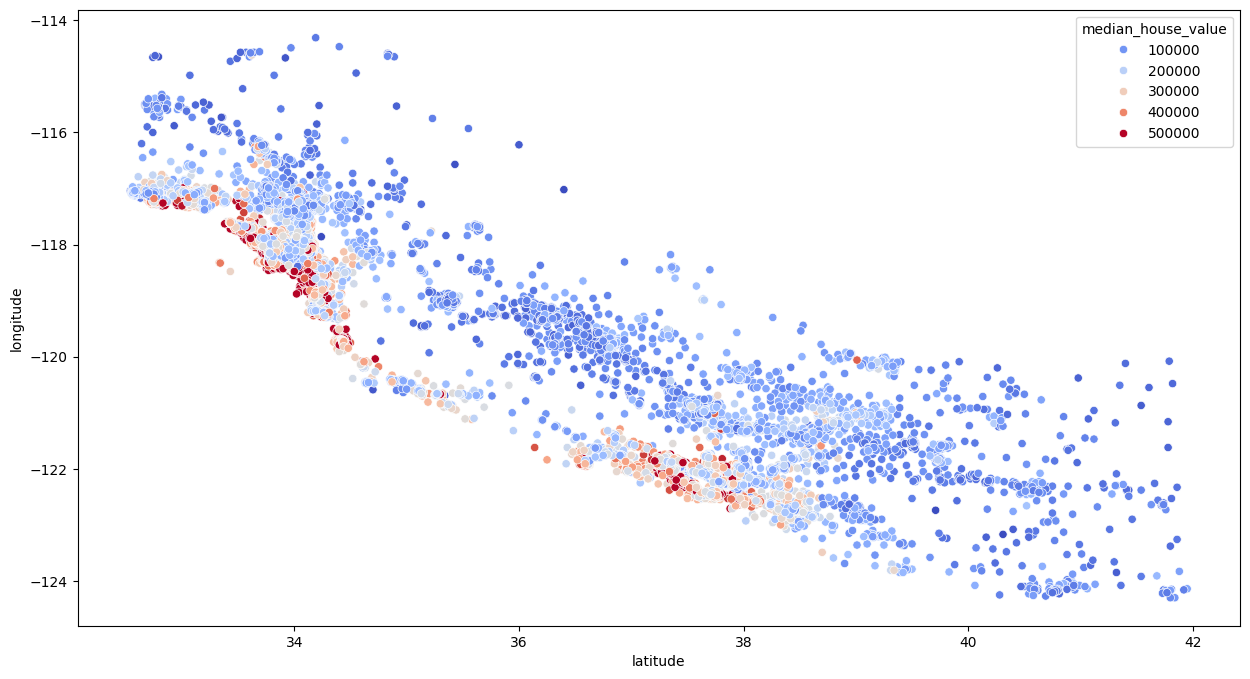

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [20]:
train_data["badrooms_ratio"]=train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["households_rooms"]=train_data["total_rooms"]/train_data["households"]

<Axes: >

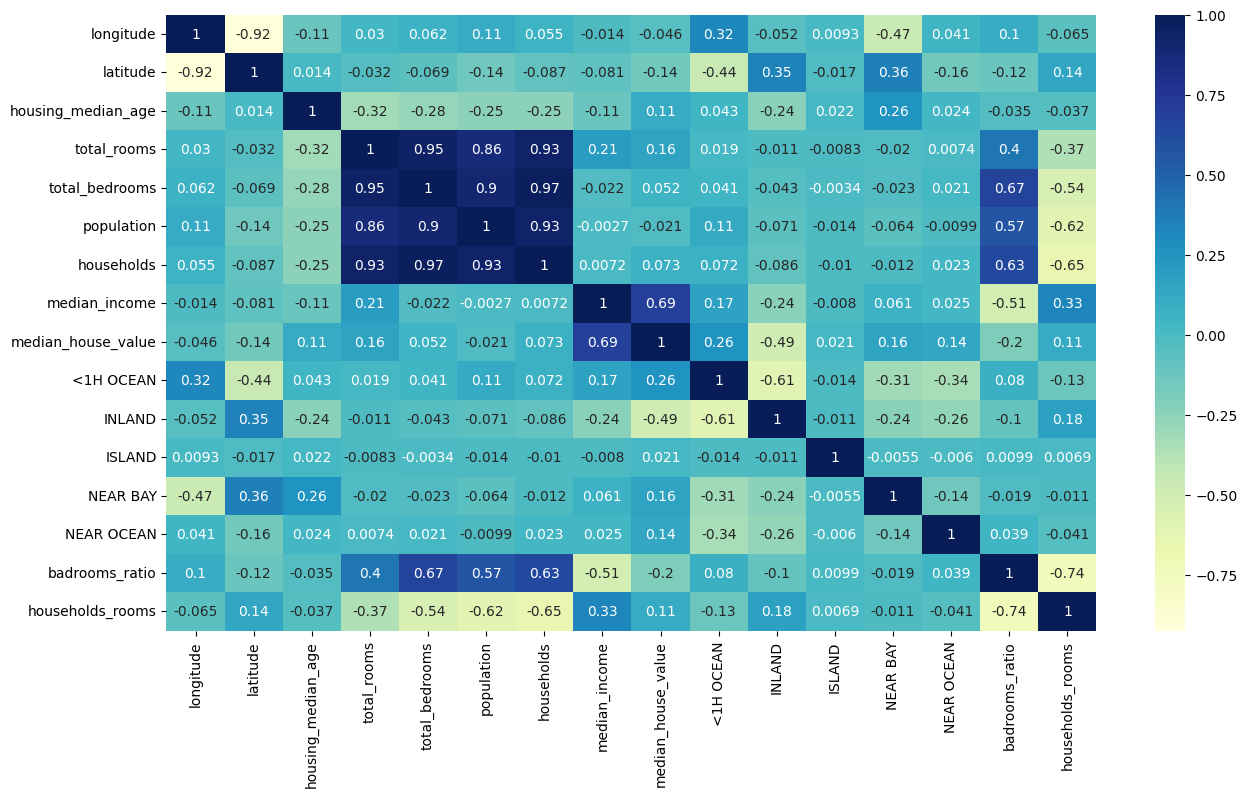

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train,y_train=train_data.drop("median_house_value",axis=1),train_data["median_house_value"]

x_train_s=Scaler.fit_transform(x_train)

reg=LinearRegression()
reg.fit(x_train,y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [24]:

import pandas as pd
import numpy as np

# Assuming you have x_train_s as your training features DataFrame


feature_names = x_train_s.columns

# Joining x_test and y_test
test_data = x_test.join(y_test)

# Applying log transformation to specific columns
test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

# One-hot encoding the "ocean_proximity" column
test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"])).drop("ocean_proximity", axis=1)

# Adding the "ISLAND" column if it doesn't exist
if 'ISLAND' not in test_data.columns:
    test_data['ISLAND'] = 0

# Creating additional features
test_data["badrooms_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["households_rooms"] = test_data["total_rooms"] / test_data["households"]

# Splitting test data back into features (x_test) and target (y_test)
x_test, y_test = test_data.drop("median_house_value", axis=1), test_data["median_house_value"]

# Ensure the order of columns in x_test matches the order during the fit
x_test = x_test[feature_names]

# Scoring the model
score = reg.score(x_test, y_test)
print(score)






AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
!pip install scikit-learn
from sklearn.ensemble import RandomForestRegressor
Forest=RandomForestRegressor()
Forest.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
Forest.score(x_test_s,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


-0.05465219390011411

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree = DecisionTreeRegressor()

In [ ]:
decision_tree.fit(x_train_s, y_train)

DecisionTreeRegressor()

In [ ]:
score = decision_tree.score(x_test, y_test)
print(score)

-4.783478700499288


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()


In [ ]:
svc.fit(x_train_s,y_train)

SVC()